In [1]:
import os
import sys
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aqiGDL
%matplotlib inline

In [3]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
colors = ['7A76C2', 'ff6e9c98', 'f62196', '18c0c4', 'f3907e', '66E9EC']

In [4]:
gdf_est = aqiGDL.gdf_from_db('estaciones_gdl','Estaciones')
#gdf_est = ox.project_gdf(gdf_est,to_crs='EPSG:32613')

In [12]:
gdf_est.head(2)

,Name,x,y,geometry
0,10. Colon,-103.400806,20.606105,POINT (-103.40081 20.60610)
1,11. UVM,-103.406642,20.608323,POINT (-103.40664 20.60832)


In [44]:
data = []
areas = {}
for i in range(len(gdf_est)):
    x = gdf_est.at[i,'x']
    y = gdf_est.at[i,'y']
    est = gdf_est.at[i,'Name']
    point = (y, x)
    dist = 1000
    tags = {'building': True}
    gdf = ox.geometries_from_point(point, tags, dist=dist)
    gdf['Estacion'] = est
    # calculate the area in projected units (meters) of each building footprint
    gdf = ox.project_gdf(gdf)
    gdf['area'] = gdf_proj.area
    data.append(gdf)
    areas[est] = gdf['area'].sum()

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
potential = 6600 #Per roof median potential kWh AC/yr https://insights.sustainability.google/places/ChIJOwV0Q_qxKIQR7NCkjDwfR-k/solar
df = pd.DataFrame(areas, index = ['area']).T
df['kWh_year'] = df['area'] * potential
gdf_est_ = ox.project_gdf(gdf_est)
gdf_est_ = gdf_est_.merge(df, right_index=True, left_on = 'Name')

/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
gdf_ = pd.concat(data, ignore_index=True)


/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/natera/miniconda3/envs/ox/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(658848.8096066542, 679124.3225759314, 2274207.8519104533, 2296335.916540988)

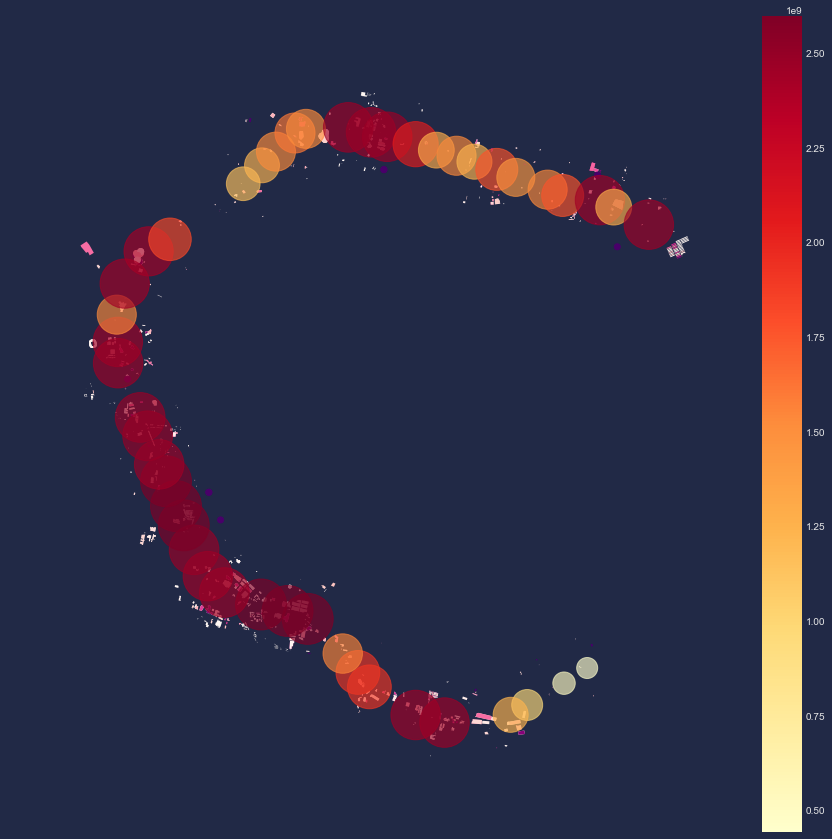

In [68]:
fig, ax = plt.subplots(1,1,figsize = (15,15))
gdf_.plot(ax=ax, column='area')
gdf_est_.plot(ax=ax, column = 'kWh_year', cmap='YlOrRd', markersize=gdf_est_['kWh_year']/1000000, alpha=0.65, legend=True)
ax.axis('off')

In [ ]:
for